# Package import

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import random
import timeit
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import resample
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
random.seed(9001) # For Reproducibility of Results
%matplotlib inline

pd.set_option('display.max_rows', 300)

# Data Load

In [190]:
#NOMIS - CENSUS DATA - DIMENSIONS
population = pd.read_csv('postcodeArea/populationCount.csv', skiprows=8) # 105*8
ageStructure = pd.read_csv('postcodeArea/ageStructure.csv', skiprows=8) #105*20
relationalSituation = pd.read_csv('postcodeArea/relational.csv', skiprows=8) #105*8
livingArrangements = pd.read_csv('postcodeArea/livingArrangements.csv', skiprows=8) #105*9
householdComposition = pd.read_csv('postcodeArea/householdComposition.csv', skiprows=8) #105*23
notInEmploymentDependencies = pd.read_csv('postcodeArea/notInEmploymentDependencies.csv', skiprows=8) #105*10
loneParentDependencies = pd.read_csv('postcodeArea/loneParentDependencies.csv', skiprows=8)#105*13
ethnicGroup = pd.read_csv('postcodeArea/ethnicGroup.csv', skiprows=8) #105*25
industry = pd.read_csv('postcodeArea/industry.csv', skiprows=8)#105*26
tenure = pd.read_csv('postcodeArea/tenure.csv', skiprows=7) #105*8
hoursWorked = pd.read_csv('postcodeArea/hoursWorked.csv', skiprows=8) #105*6
dwelling = pd.read_csv('postcodeArea/dwelling.csv', skiprows=8) #105*5
englishProf = pd.read_csv('postcodeArea/englishProf.csv', skiprows=8) #105*7
centralHeating = pd.read_csv('postcodeArea/centralHeating.csv', skiprows=8) #105*9
passportHeld = pd.read_csv('postcodeArea/passportHeld.csv', skiprows=7) #105*73
birthCountry = pd.read_csv('postcodeArea/birthCountry.csv', skiprows=8) #105*9
religion = pd.read_csv('postcodeArea/religion.csv', skiprows=8) #8063*12
generalHealth = pd.read_csv('postcodeArea/generalHealth.csv', skiprows=8) #105*7
yearLastWorked = pd.read_csv('postcodeArea/yearLastWorked.csv', skiprows=8) #105*13
householdSize = pd.read_csv('postcodeArea/householdSize.csv', skiprows=8) #105*10
carOrVanAvailability = pd.read_csv('postcodeArea/carOrVanAvailability.csv', skiprows=8) #105*7
distanceTravelledtoWork = pd.read_csv('postcodeArea/distanceTravelledtoWork.csv', skiprows=8) #105*14
methodofTraveltoWork = pd.read_csv('postcodeArea/methodofTraveltoWork.csv', skiprows=8) #105*14
ageofArrival = pd.read_csv('postcodeArea/ageofArrival.csv', skiprows=8) #105*19
lengthofResidence = pd.read_csv('postcodeArea/lengthofResidence.csv', skiprows=8) #105*7
occupationType = pd.read_csv('postcodeArea/occupation.csv', skiprows=8) #105*11
mainLanguage = pd.read_csv('postcodeArea/mainLanguage.csv', skiprows=8) #105*105
bedrooms = pd.read_csv('postcodeArea/bedrooms.csv', skiprows=8) #105*8
longTermDisability = pd.read_csv('postcodeArea/longTermDisability.csv', skiprows=8) #105*5
economicActivity = pd.read_csv('postcodeArea/economicActivity.csv', skiprows=8) #105*17
positionInCommunalEstablishment = pd.read_csv('postcodeArea/positionInCommunalEstablishment.csv', skiprows=8) #105*5
accomType = pd.read_csv('postcodeArea/accomType.csv', skiprows=8) #105*13
secondAddress = pd.read_csv('postcodeArea/secondAddress.csv', skiprows=8) #105*6
formerIndustry = pd.read_csv('postcodeArea/formerIndustry.csv', skiprows=8) #105*11
formerOccupation = pd.read_csv('postcodeArea/formerOccupation.csv', skiprows=8) #105*12


religion = religion.drop(religion.index[-24:]) # line added due to notes at bottom of CSV

qualification = pd.read_csv('postcodeArea/qualification.csv', skiprows=8) #105*14   # AS A PROPORTION ONLY 


# Set up classification problem

In [191]:
qualification.drop(qualification.columns[[1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)
qualification = qualification.rename(index=str, columns={"Highest level of qualification: Level 4 qualifications and above": "target"})

In [192]:
qualification.quantile(0.7) # Check to see where 70 percent quartile is to setup class imbalance

target    29.5
Name: 0.7, dtype: float64

In [193]:
# Assign a 1 or a zero as a output depending on whether proportion of people have, or don't have a higher education degree
qualification['classification'] = np.where(qualification['target']>=29.5, 1, 0) 

#Check
values = qualification.groupby('classification').count()
values['perc']= values['target']/values['target'].sum()
values

postcode areas  target      perc
classification                                  
0                           73      73  0.695238
1                           32      32  0.304762

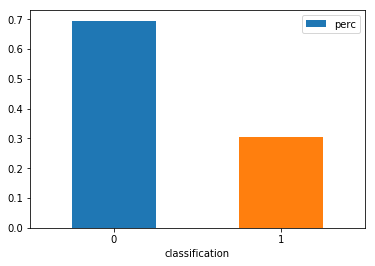

In [194]:
ax = values.plot.bar(y = 'perc',rot=0, )

# Combine datasets

In [195]:
###Merge different datasets
newDF = [population, ageStructure, relationalSituation, livingArrangements, householdComposition,notInEmploymentDependencies,loneParentDependencies,ethnicGroup,industry,tenure, hoursWorked,dwelling,englishProf,centralHeating,passportHeld,birthCountry,religion,generalHealth,yearLastWorked,householdSize,carOrVanAvailability,distanceTravelledtoWork,methodofTraveltoWork,ageofArrival,lengthofResidence,occupationType,mainLanguage,bedrooms,longTermDisability,economicActivity,positionInCommunalEstablishment,accomType,secondAddress,formerIndustry,formerOccupation,qualification]
newDF2 = pd.concat([i.set_index('postcode areas') for i in newDF],axis=1, join='outer')

In [196]:
#Check for dimensions
newDF2.shape

(109, 905)

In [197]:
#drop rows without any information
newDF3 = newDF2.dropna()
newDF3.shape

(105, 905)

In [198]:
#drop duplicate columns arising from merging...
newDF4 = newDF3.T.drop_duplicates().T

In [199]:
#remove spaces from variable names to allow access to columns
newDF4.columns = newDF4.columns.map(lambda x: x.replace(' ', '_'))

# Splitting data into Train, Test and Validation

In [200]:
featuresforTraining = newDF4.drop(['target','classification'], axis=1)

In [201]:
#Define function for splitting data
def validationTrainTestSplit(featuresforTraining, newDF4):#Splits data into 60-20-20 spilt 
    X_train1, X_test, y_train1, y_test = train_test_split(featuresforTraining, newDF4.classification, random_state=0, test_size=.2)
    X_train, X_validation, y_train,y_validation = train_test_split(X_train1, y_train1, random_state=0, test_size=.25)
    
    return X_train, X_test, X_validation, y_train, y_validation,y_test

In [202]:
#Execute function for splitting data
X_train, X_test, X_validation, y_train, y_validation,y_test = validationTrainTestSplit(featuresforTraining,newDF4)

In [203]:
#Check to see if 60-20-20 split correct
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(63, 852)
(21, 852)
(21, 852)


In [204]:
y_train=y_train.astype('int')
y_test = y_test.astype('int')
y_validation = y_validation.astype('int')

# Feature Selection Stage

In [205]:
#Select about 80 features
select = SelectPercentile(percentile=10)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

In [206]:
#check to see if reduction is correctly executed
print("The shape of X_train is:  ",  X_train.shape)
print("The shape of X_train_selected is:  ",  X_train_selected.shape)

The shape of X_train is:   (63, 852)
The shape of X_train_selected is:   (63, 86)


[False False False False False False False  True False False False False
 False False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True False False  True False False  True False  True  True  True
 False False False False False False False False  True False False False
 False False False  True False False False False False False False False
  True  True False False False False False False False False False False
  True False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False Fa

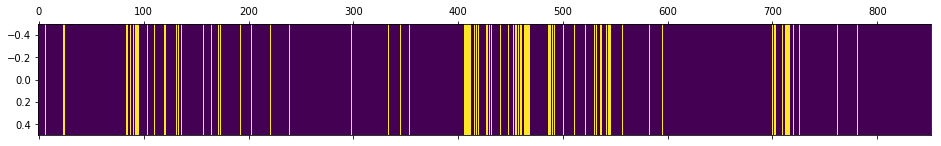

In [207]:
#Array creation of features selected, as well as graphical representation
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),aspect='auto')

In [208]:
#Apply feature reduction to Validation and test set
X_validation_selected = select.transform(X_validation)
X_test_selected = select.transform(X_test)

# Selected Features

In [209]:
selectedVariables = X_train.columns[select.get_support()]


In [210]:
for i in selectedVariables:
    print(i)

Density_(number_of_persons_per_hectare)
Mean_Age
Median_Age
White:_Argentinian
White:_Australian/New_Zealander
White:_Brazilian
White:_Chilean
White:_Commonwealth_of_(Russian)_Independent_States
White:_Croatian
White:_Cuban
White:_Italian
White:_Mexican
White:_Other_Western_European
White:_Peruvian
White:_Venezuelan
White:_White_African
White:_Any_other_ethnic_group
Mixed/multiple_ethnic_group:_Chinese_and_White
Mixed/multiple_ethnic_group:_Filipino
Mixed/multiple_ethnic_group:_Japanese
Mixed/multiple_ethnic_group:_Korean
Mixed/multiple_ethnic_group:_South_Asian_and_Chinese
Mixed/multiple_ethnic_group:_White_and_East_Asian
Asian/Asian_British:_Filipino
Asian/Asian_British:_Sinhalese
Other_ethnic_group:_Japanese
C16,17_Manufacturing:_Wood,_paper_and_paper_products
J_Information_and_communication
T_Activities_of_households_as_employers;_undifferentiated_goods_-_and_services_-_producing_activities_of_households_for_own_use
Europe:_Other_Europe:_EU_countries:_Member_countries_in_March_2001

# Logistic Regression with Cross Validation

In [23]:
#Function for hyperparameter tuning
def hyperparameterTuneLogistic(i,j,X_train,y_train,X_test,y_test):
    print("        C =" + str(i) + "          Maximum Iterations =" + str(j))
#DEFINE MODEL
    logreg = LogisticRegression(C=i,max_iter=j,class_weight='balanced',random_state=123)
#TRAIN MODEL
    logreg.fit(X_train, y_train)
#Make Predictions
    y_pred = logreg.predict(X_test)
    
    
#PRINT METRICS
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    

    return

In [24]:
#HYPERPARAMETER TUNE
CValue = [0.001,0.0005,0.0001,0.01,0.5,0.1,0.5]
maxIterations = [50,100,150,200,250,300] 

        C =0.001          Maximum Iterations =50
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


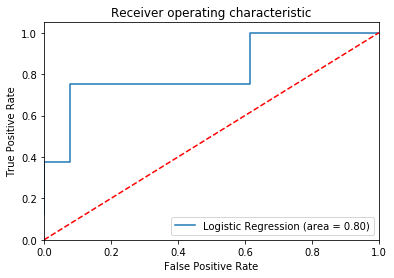

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =100
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


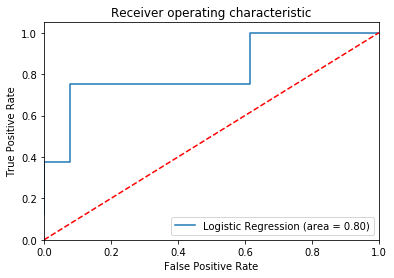

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =150
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


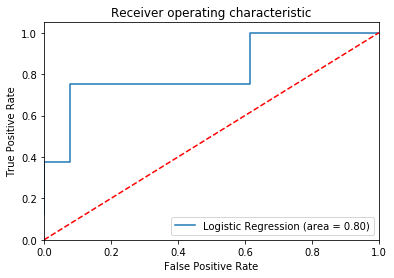

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =200
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


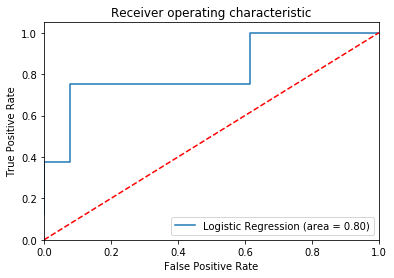

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =250
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


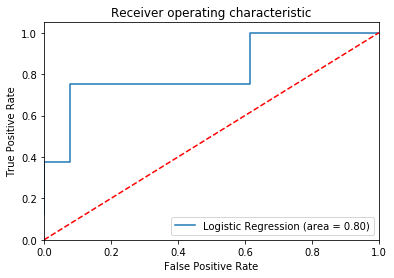

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =300
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


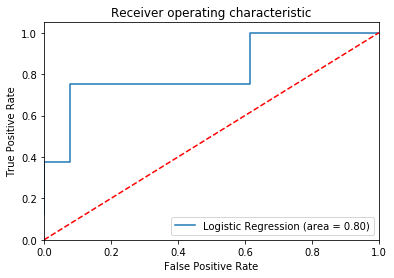

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =50
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


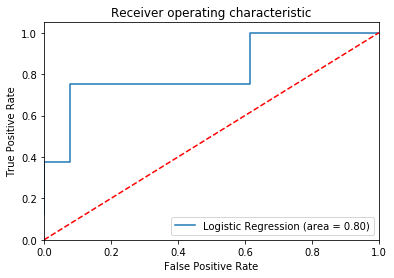

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =100
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


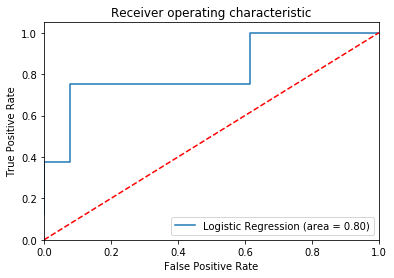

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =150
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


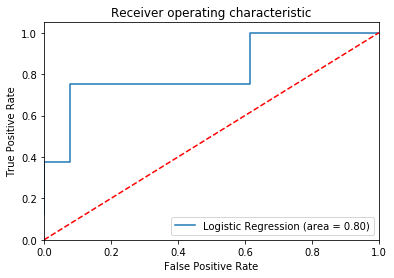

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =200
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


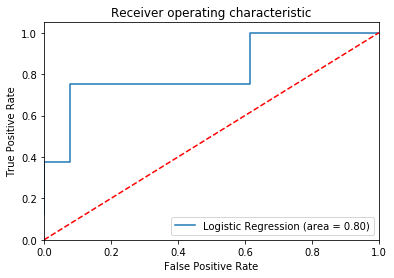

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =250
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


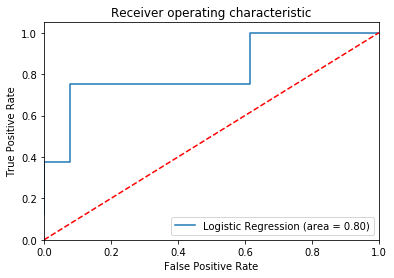

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =300
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


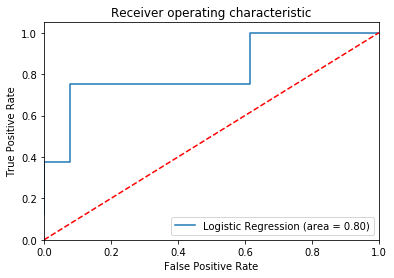

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =50
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


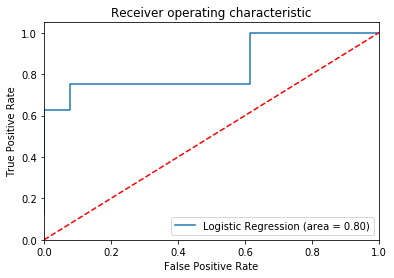

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =100
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


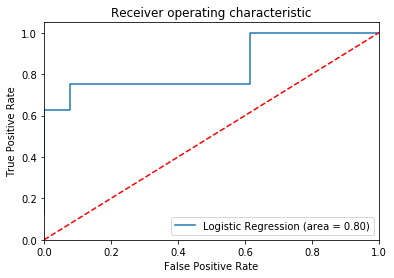

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =150
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


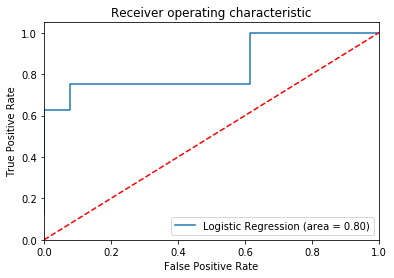

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =200
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


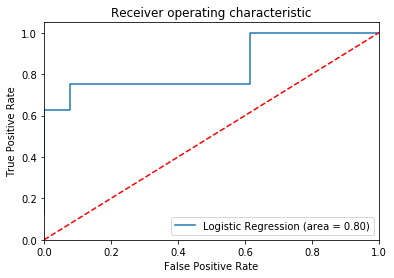

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =250
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


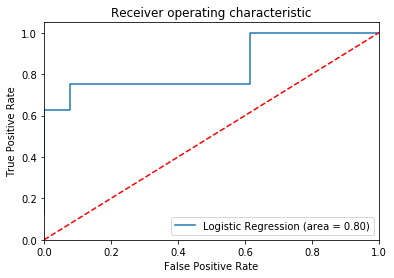

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =300
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


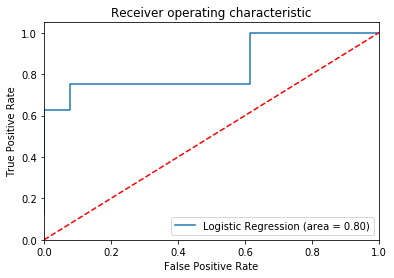

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =50
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


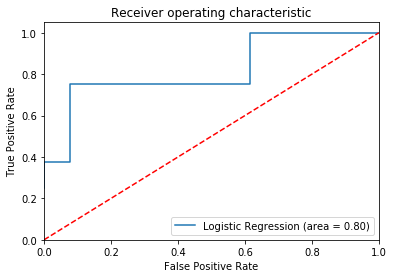

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =100
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


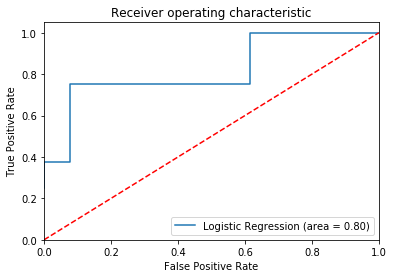

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =150
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


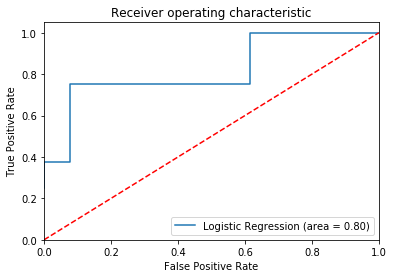

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =200
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


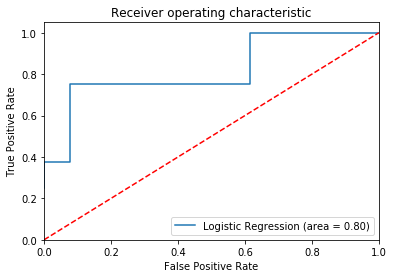

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =250
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


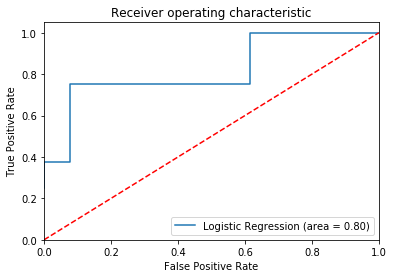

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =300
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


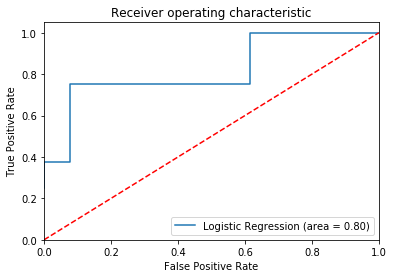

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =50
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


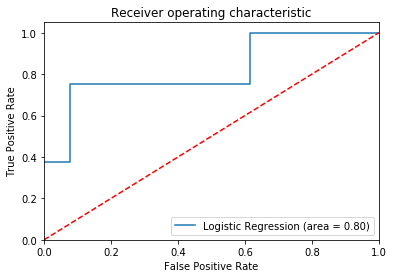

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =100
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


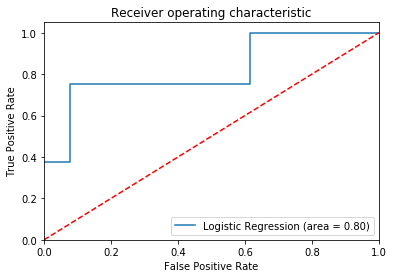

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =150
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


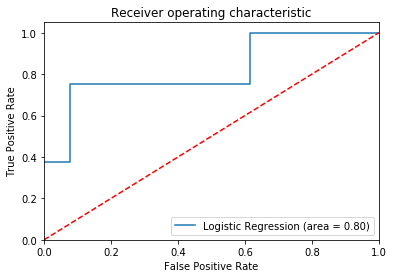

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =200
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


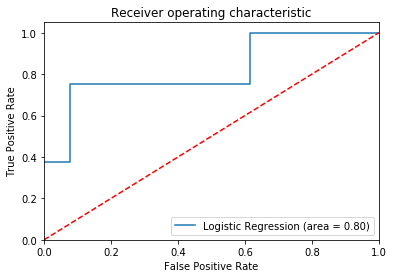

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =250
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


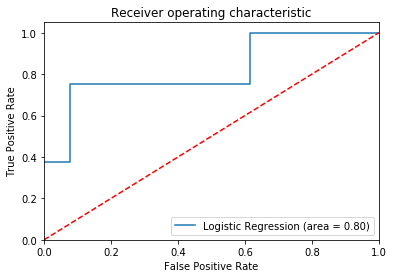

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =300
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


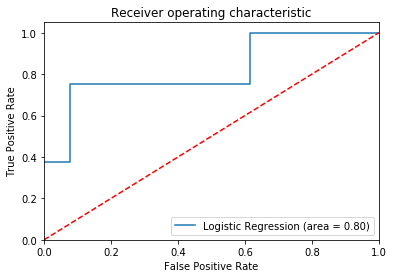

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =50
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


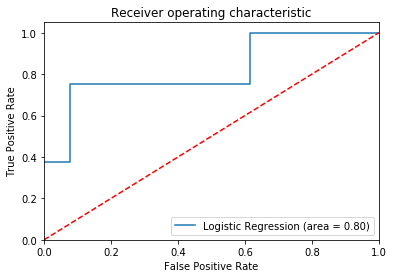

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =100
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


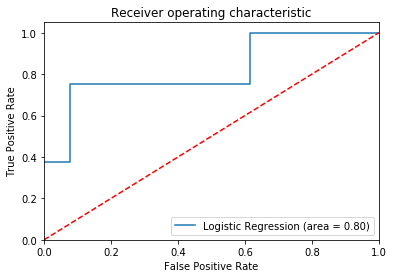

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =150
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


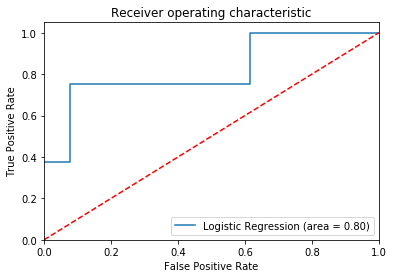

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =200
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


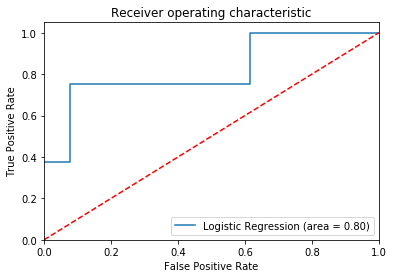

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =250
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


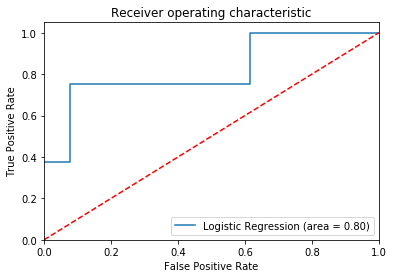

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =300
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


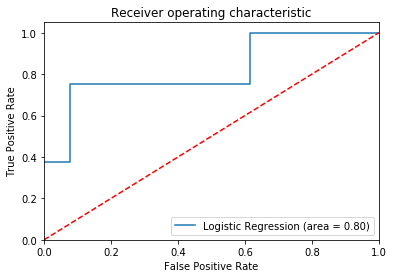

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =50
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


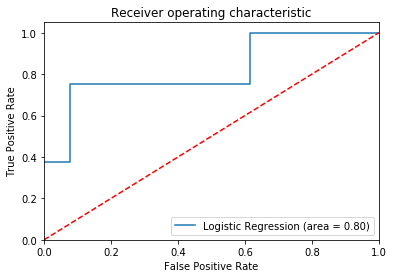

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =100
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


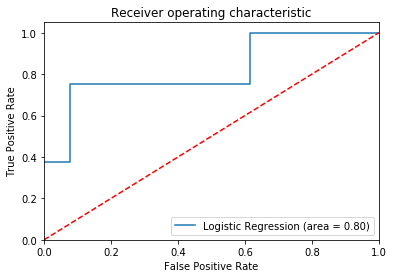

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =150
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


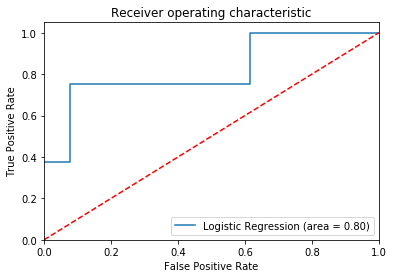

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =200
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


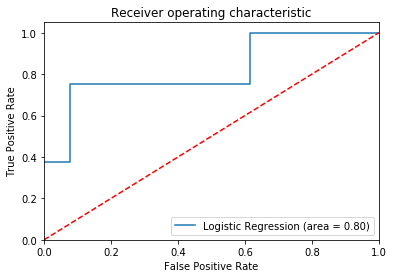

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =250
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


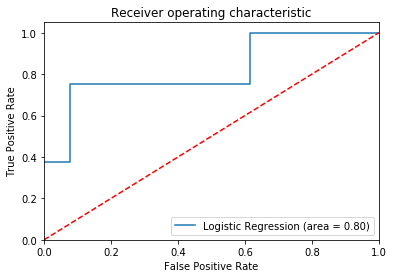

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =300
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


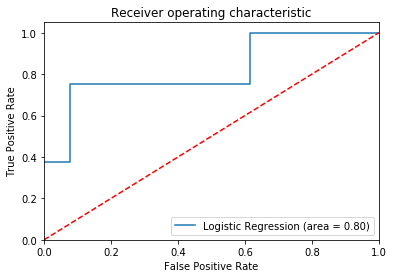

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
6.009578421948173


In [25]:
#RUN LOOP OF ALL PARAMETERS
start_time = timeit.default_timer()
for i in CValue:
    for j in maxIterations:
        hyperparameterTuneLogistic(i,j,X_train_selected, y_train, X_validation_selected, y_validation)
elapsed = timeit.default_timer() - start_time
print(elapsed)

### Logistic Regression

###### OPTIMAL PARAMETERS
###### C = 0.5    max_iter = 300
###### Execution time (6.010 seconds)


# Random Forest with Cross Validation

In [26]:
#HYPER PARAMETER TUNE
Estimators = [10,30,50,80,100,]
maxFeatures = ["auto","sqrt","log2", None ]
maxDepth = [1,10,50,100,150,None]

In [27]:
def hyperparameterTuneRandomForest(i,j,k,X_train,y_train,X_test,y_test):
    print("  Estimators =" + str(i) + "          Maximum Features =" + str(j) + "         Maximum Depth =" + str(k) )
# initiate model
    RandomForest = RandomForestClassifier(n_estimators=i, max_features = j, max_depth = k ,random_state=123, class_weight = 'balanced_subsample')

# train model
    RandomForest.fit(X_train, y_train)

#make predictions
    
    y_pred = RandomForest.predict(X_test)

#print metrics
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, RandomForest.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, RandomForest.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

  Estimators =10          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


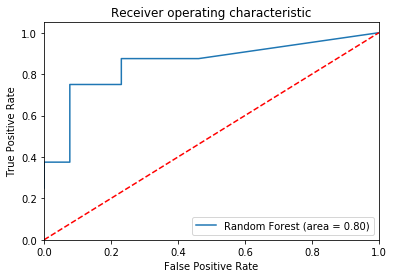

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


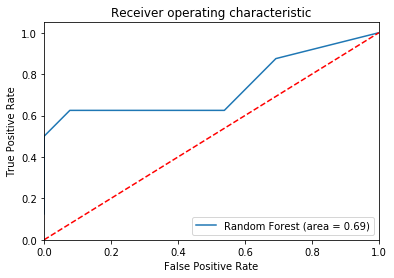

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


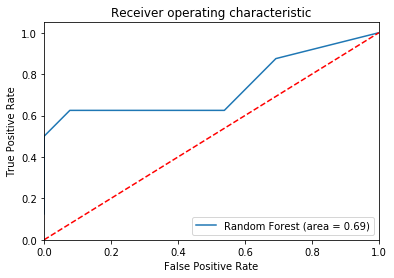

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


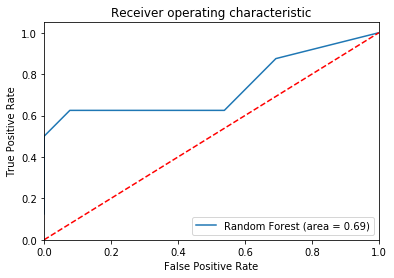

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


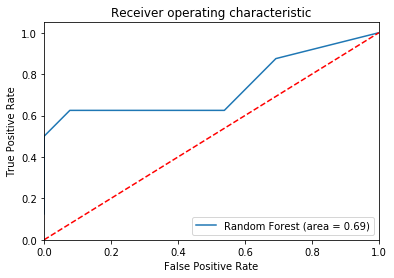

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


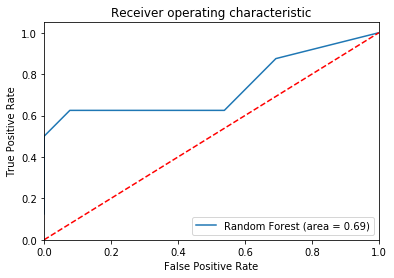

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


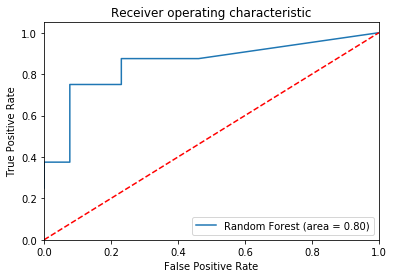

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


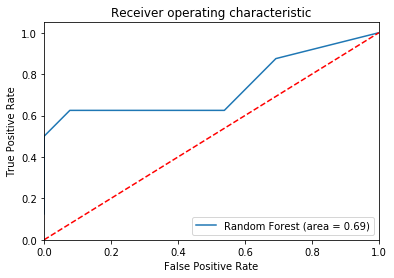

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


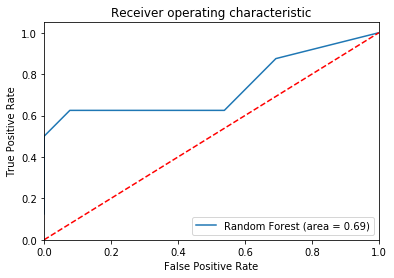

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


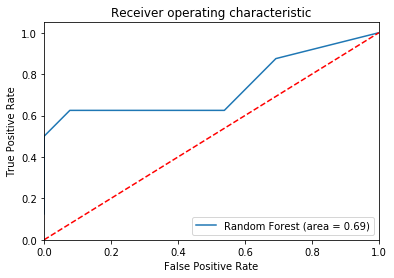

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


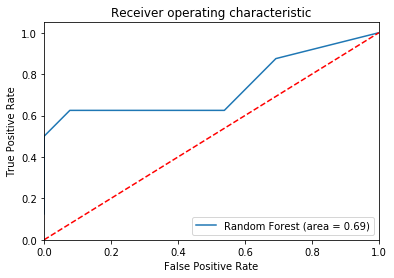

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


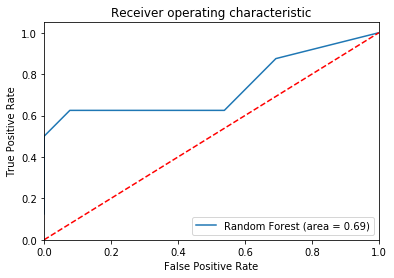

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[10  3]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.83      0.77      0.80        13
          1       0.67      0.75      0.71         8

avg / total       0.77      0.76      0.76        21

ROC CURVE


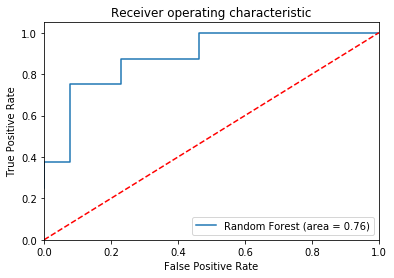

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


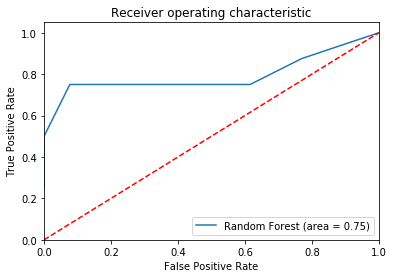

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


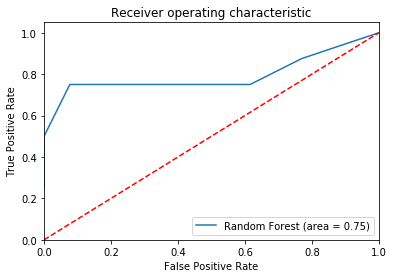

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


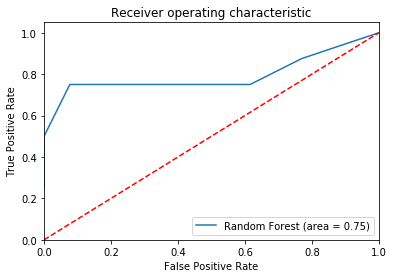

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


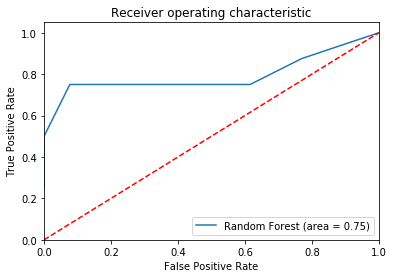

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


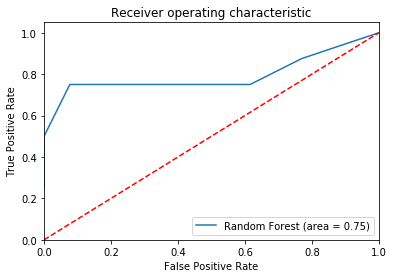

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[10  3]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.77      0.77      0.77        13
          1       0.62      0.62      0.62         8

avg / total       0.71      0.71      0.71        21

ROC CURVE


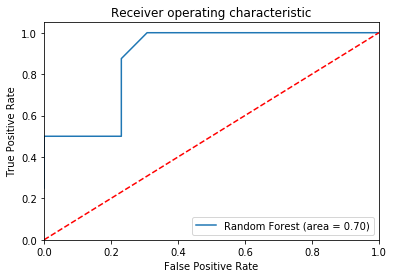

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


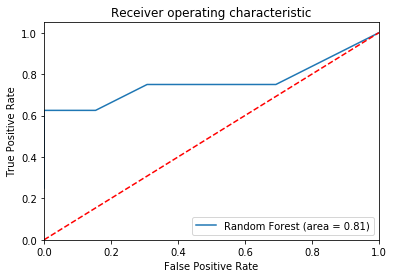

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


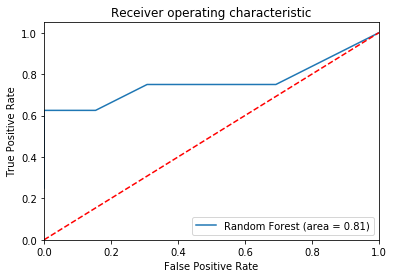

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


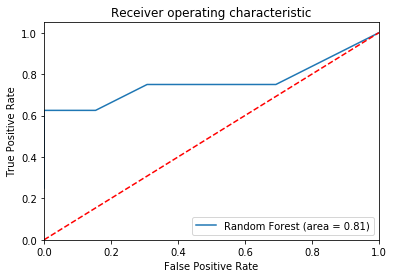

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


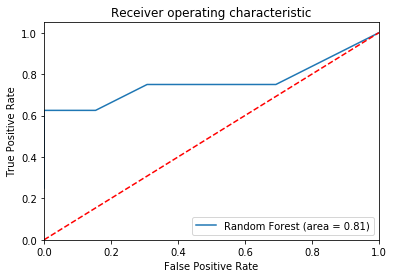

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


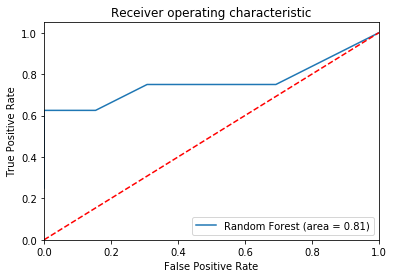

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[10  3]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.83      0.77      0.80        13
          1       0.67      0.75      0.71         8

avg / total       0.77      0.76      0.76        21

ROC CURVE


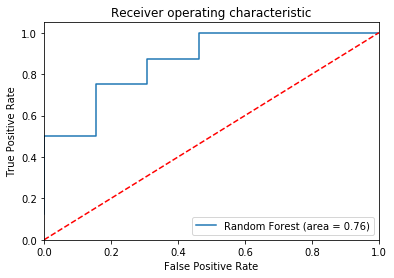

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


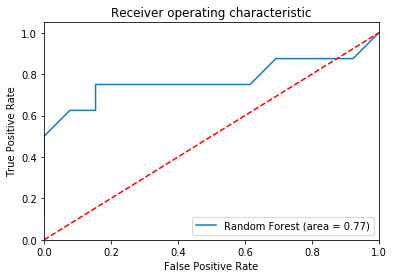

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


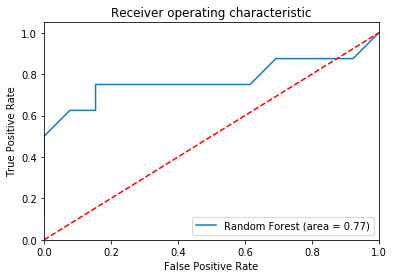

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


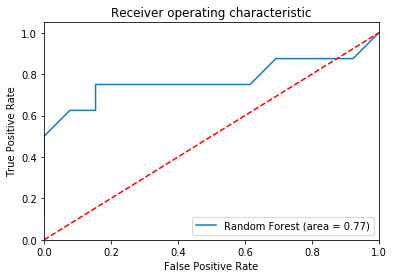

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


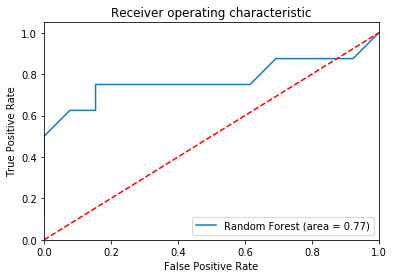

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


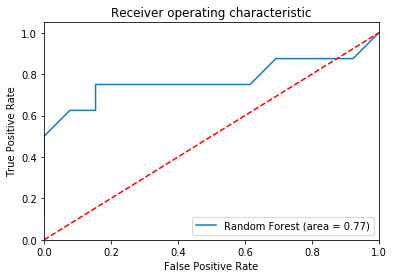

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[10  3]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.83      0.77      0.80        13
          1       0.67      0.75      0.71         8

avg / total       0.77      0.76      0.76        21

ROC CURVE


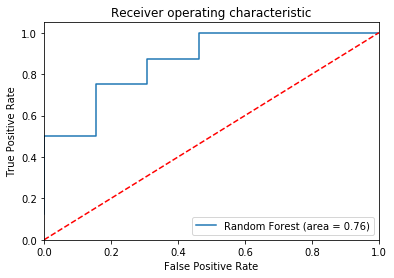

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


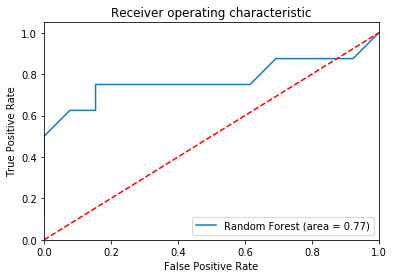

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


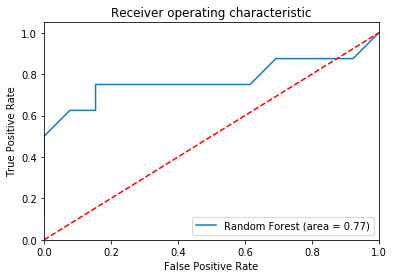

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


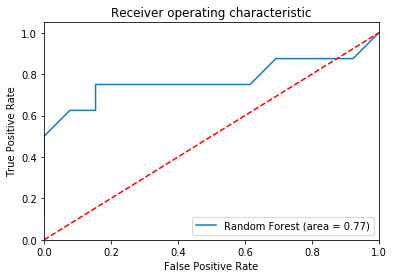

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


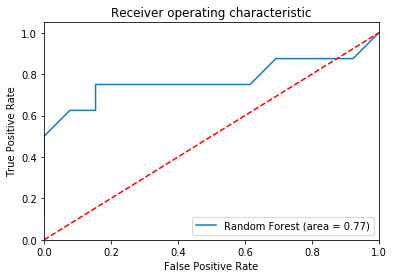

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


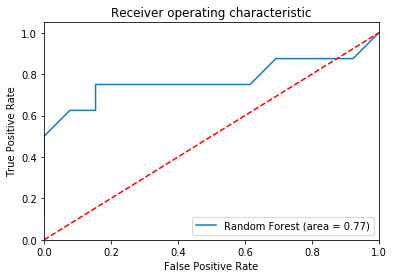

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[10  3]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.83      0.77      0.80        13
          1       0.67      0.75      0.71         8

avg / total       0.77      0.76      0.76        21

ROC CURVE


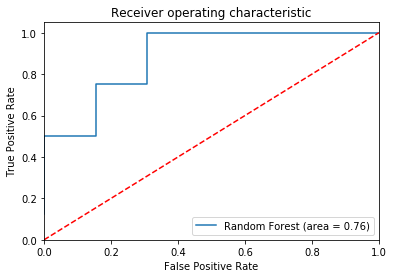

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


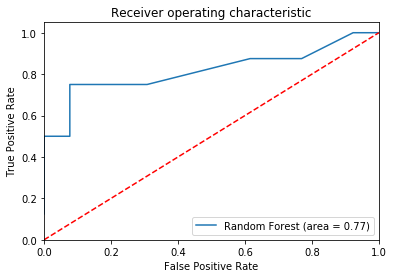

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


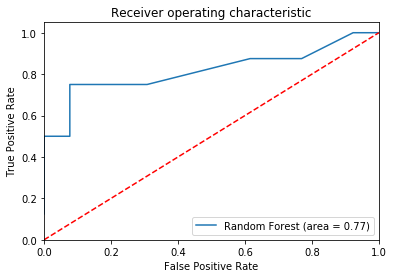

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


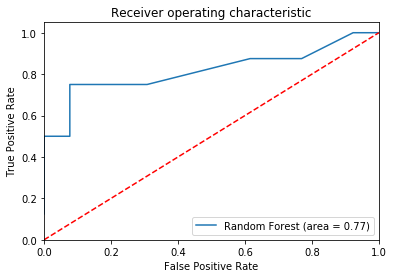

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


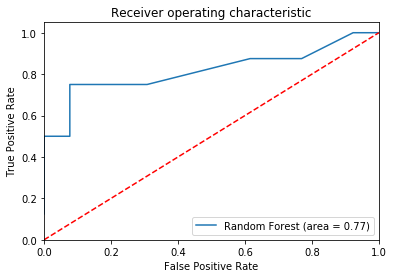

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


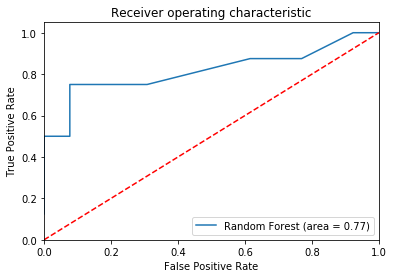

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.73      0.85      0.79        13
          1       0.67      0.50      0.57         8

avg / total       0.71      0.71      0.70        21

ROC CURVE


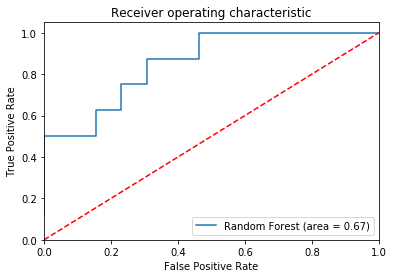

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


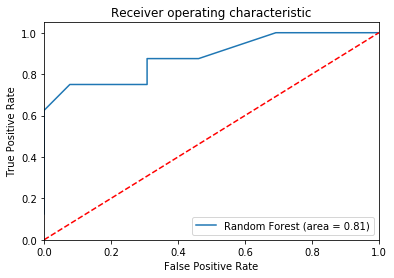

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


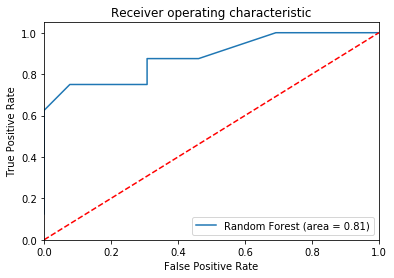

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


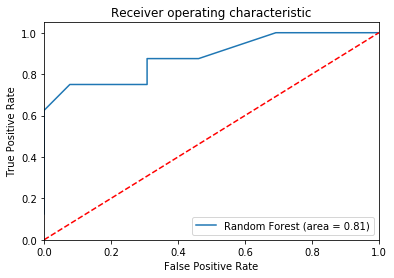

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


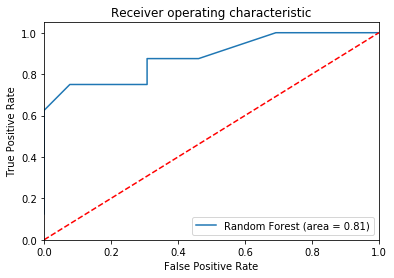

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


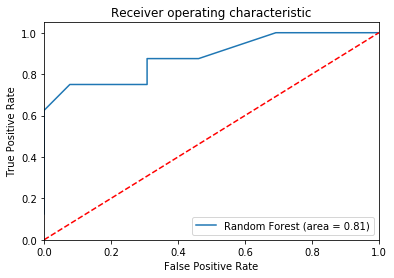

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[9 4]
 [2 6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.69      0.75        13
          1       0.60      0.75      0.67         8

avg / total       0.74      0.71      0.72        21

ROC CURVE


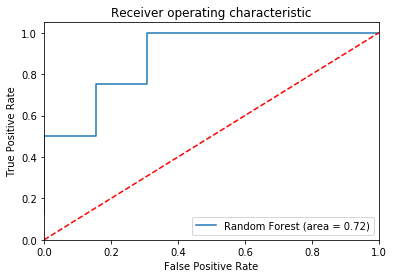

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


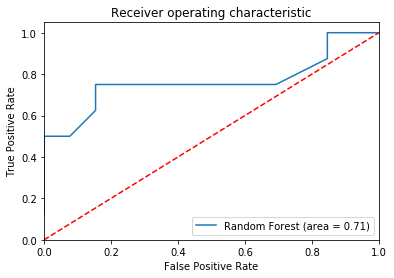

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


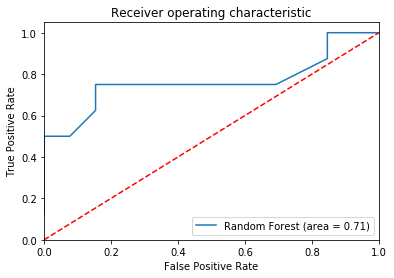

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


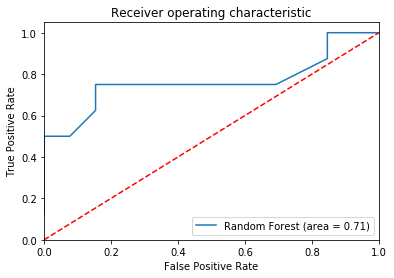

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


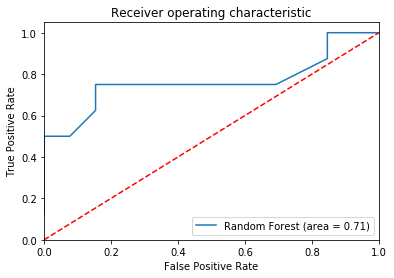

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


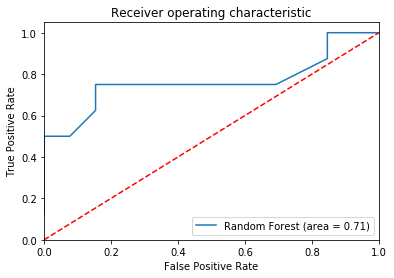

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[9 4]
 [2 6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.69      0.75        13
          1       0.60      0.75      0.67         8

avg / total       0.74      0.71      0.72        21

ROC CURVE


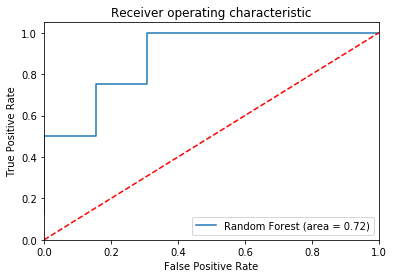

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


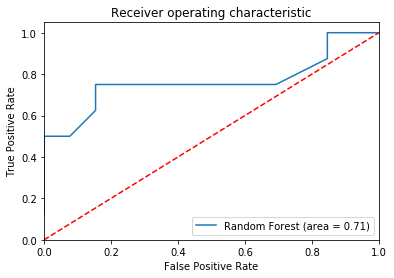

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


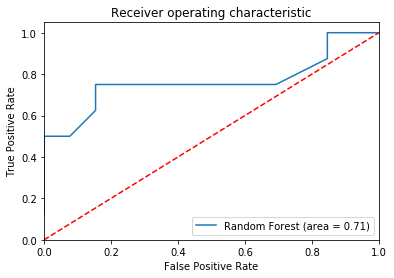

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


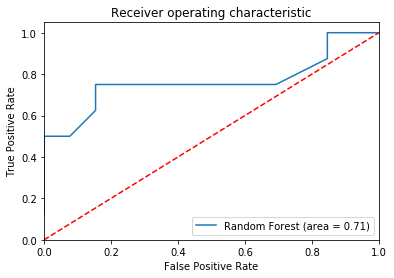

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


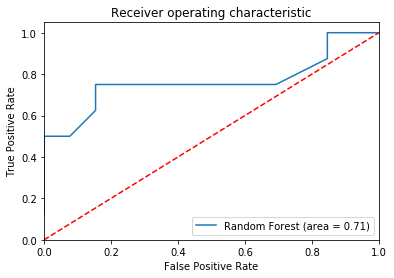

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


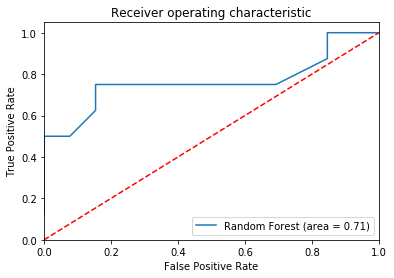

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[10  3]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.83      0.77      0.80        13
          1       0.67      0.75      0.71         8

avg / total       0.77      0.76      0.76        21

ROC CURVE


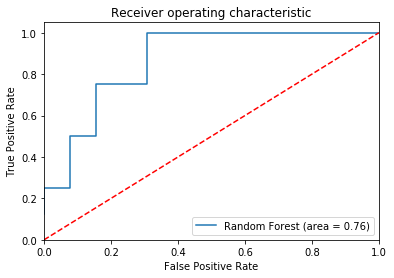

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


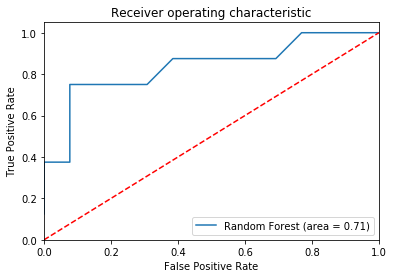

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


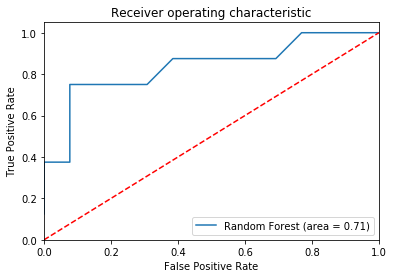

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


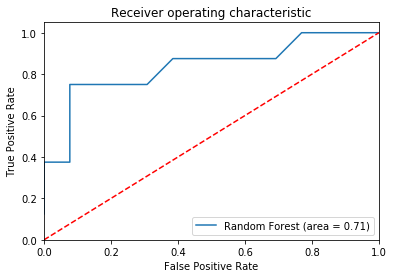

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


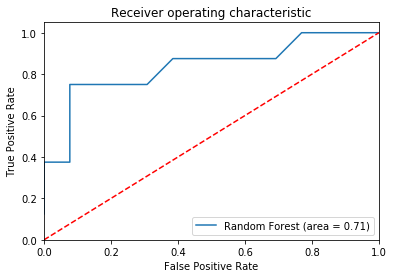

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


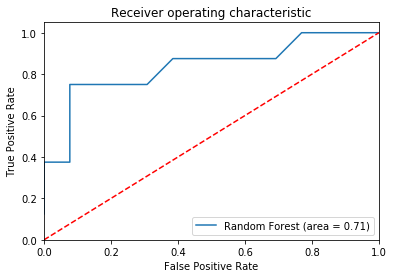

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.79      0.85      0.81        13
          1       0.71      0.62      0.67         8

avg / total       0.76      0.76      0.76        21

ROC CURVE


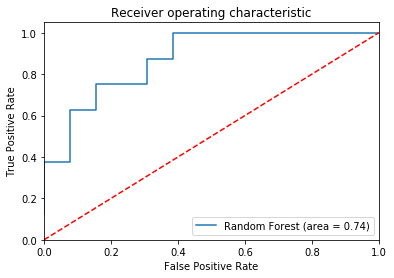

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


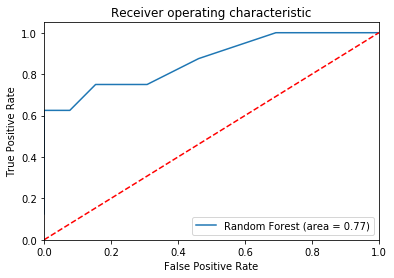

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


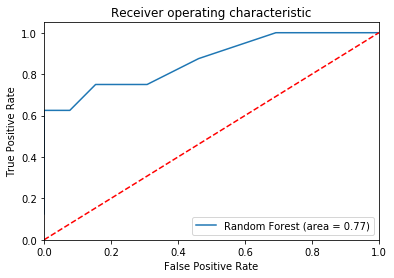

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


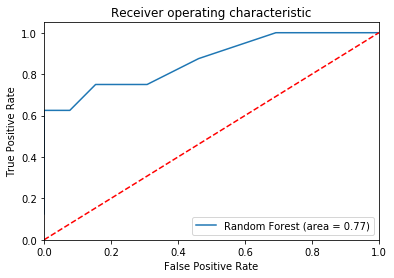

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


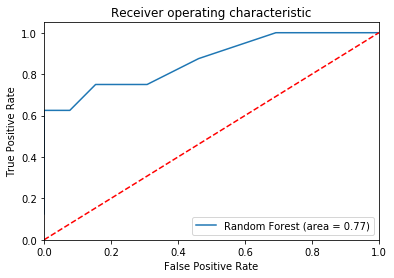

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


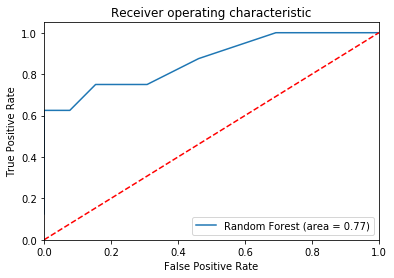

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


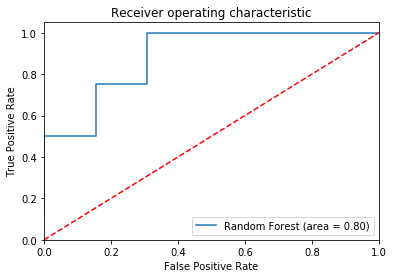

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


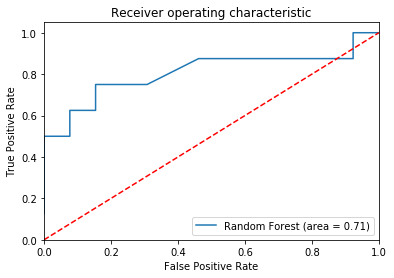

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


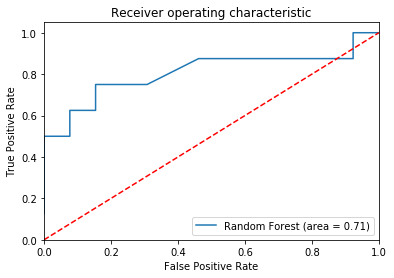

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


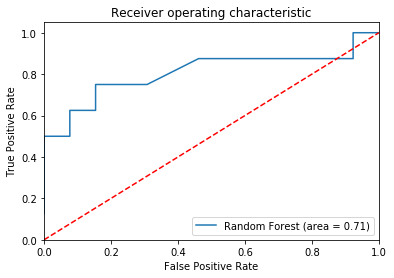

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


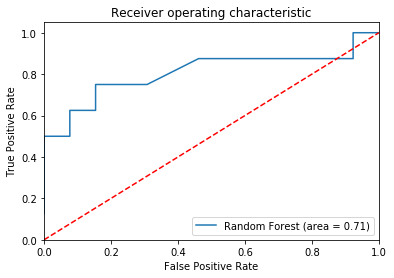

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


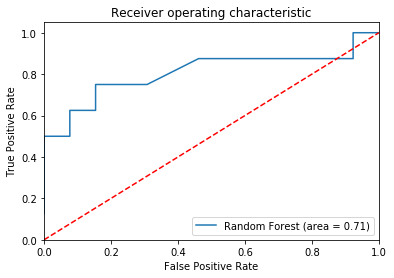

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


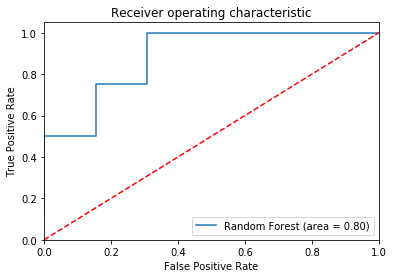

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


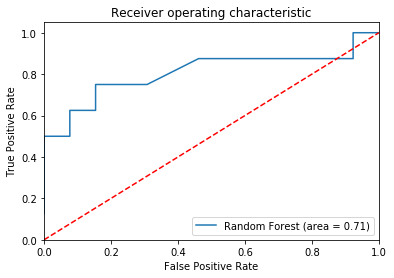

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


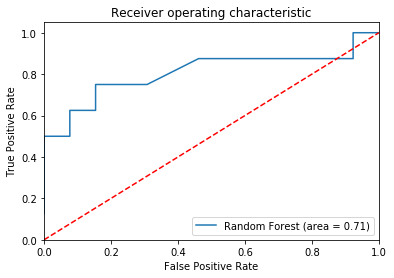

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


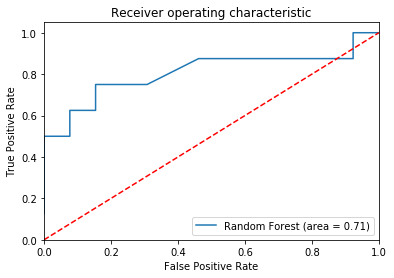

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


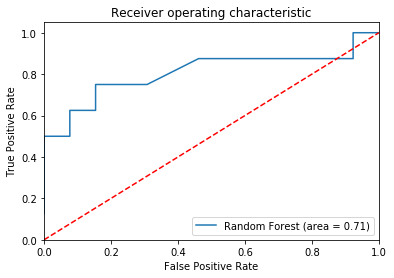

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


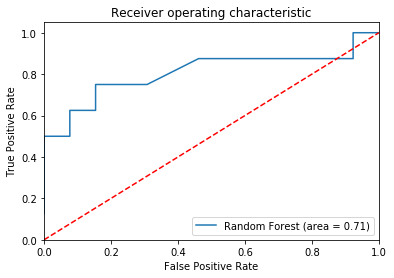

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


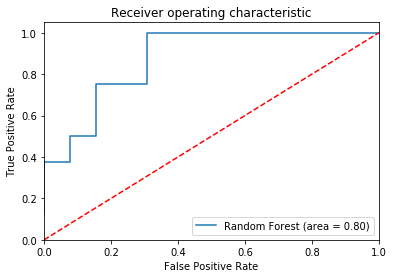

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


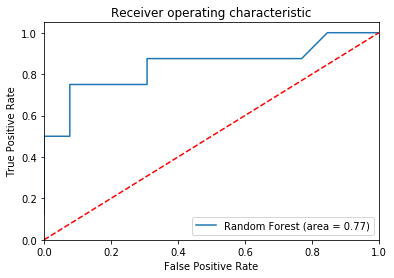

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


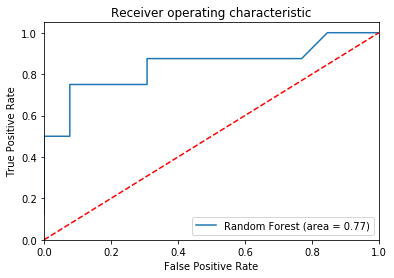

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


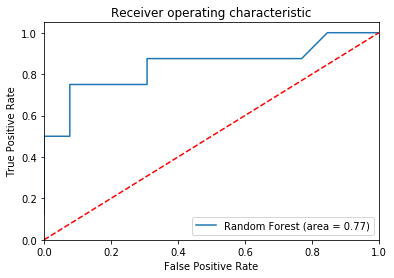

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


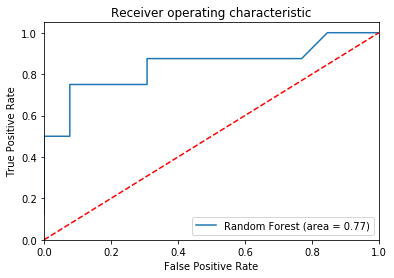

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


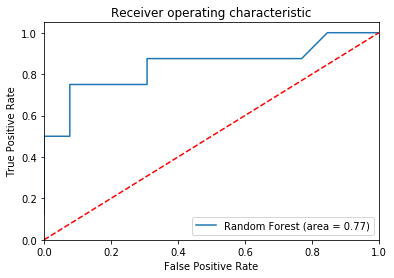

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.79      0.85      0.81        13
          1       0.71      0.62      0.67         8

avg / total       0.76      0.76      0.76        21

ROC CURVE


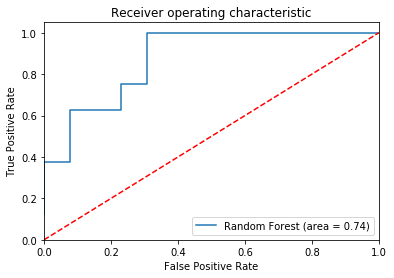

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


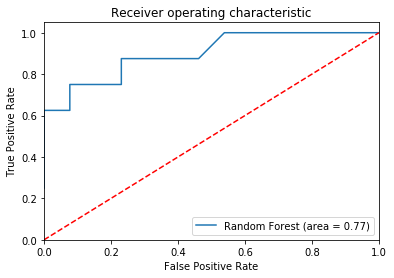

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


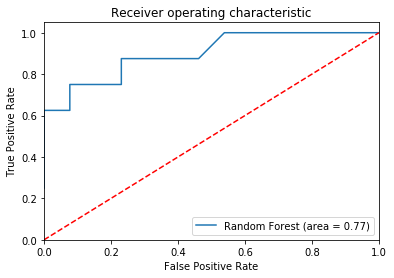

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


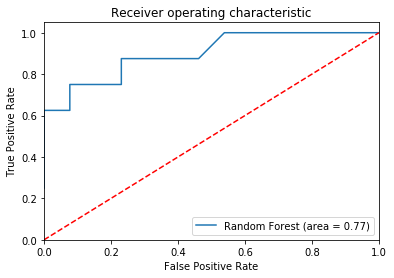

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


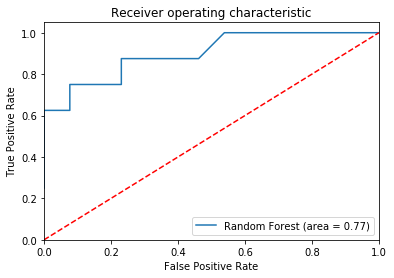

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


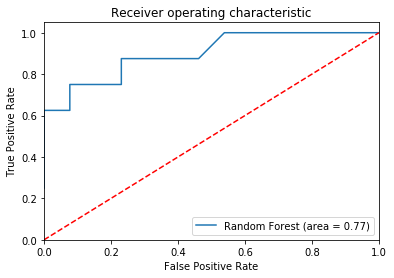

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


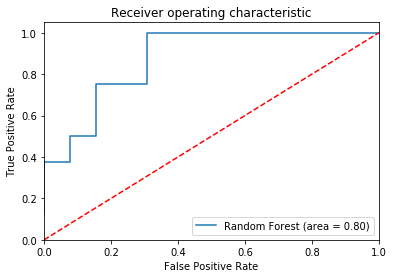

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


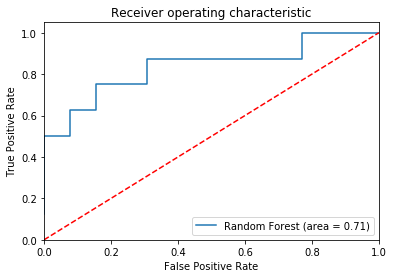

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


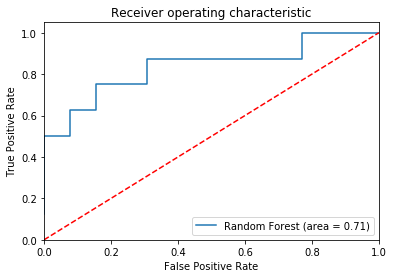

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


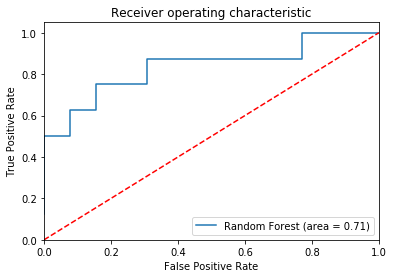

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


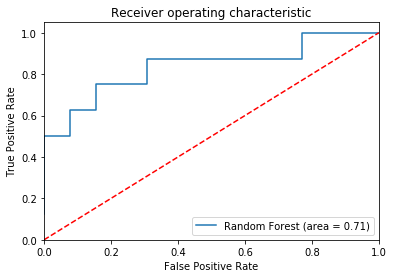

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


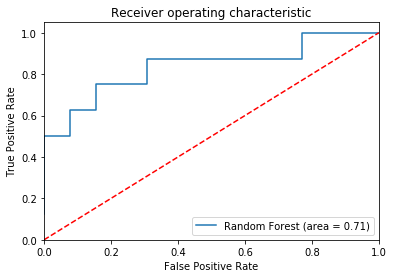

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


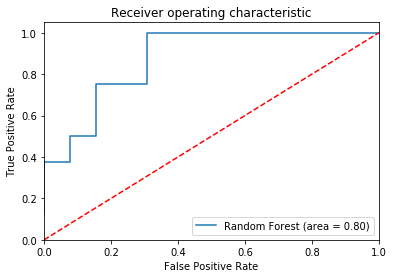

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


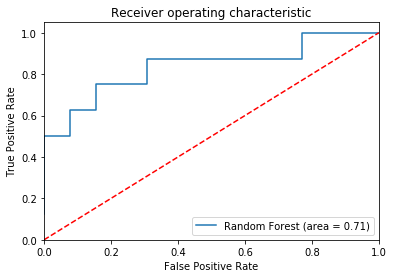

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


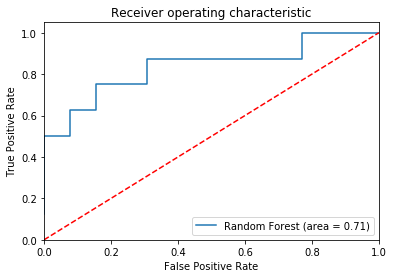

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


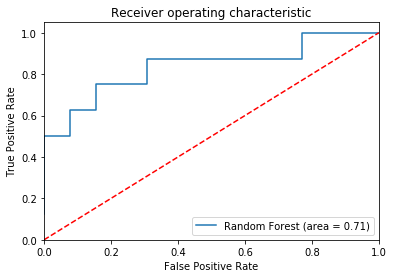

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


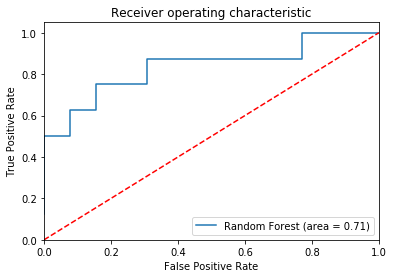

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.75      0.92      0.83        13
          1       0.80      0.50      0.62         8

avg / total       0.77      0.76      0.75        21

ROC CURVE


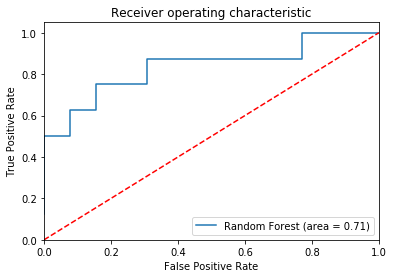

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


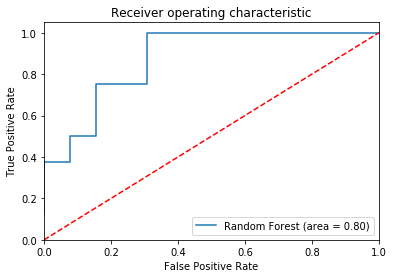

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


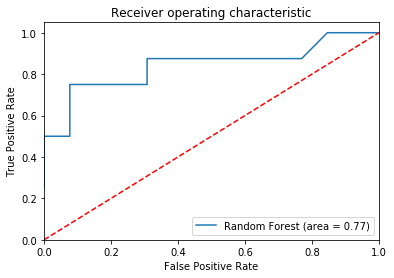

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


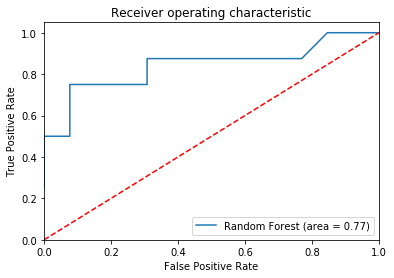

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


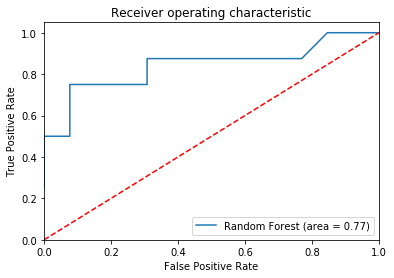

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


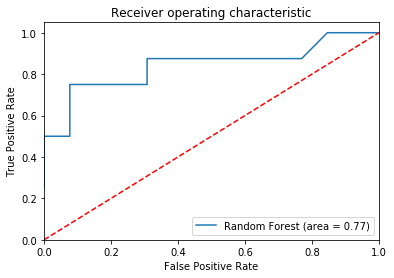

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.83      0.62      0.71         8

avg / total       0.81      0.81      0.80        21

ROC CURVE


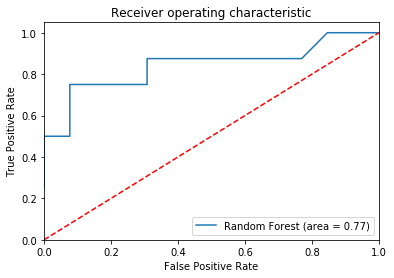

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[11  2]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        13
          1       0.75      0.75      0.75         8

avg / total       0.81      0.81      0.81        21

ROC CURVE


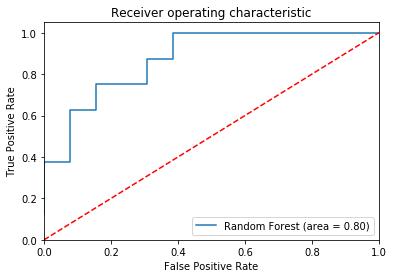

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


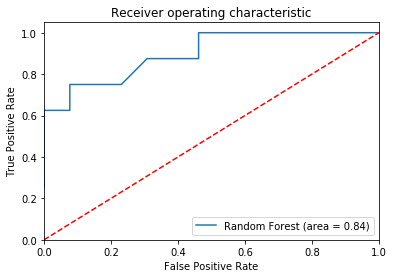

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


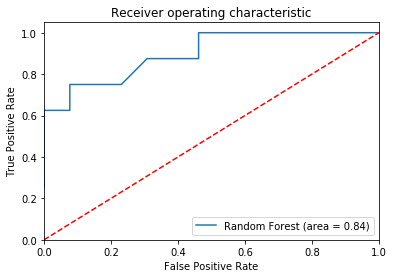

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


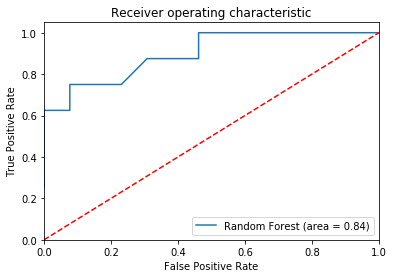

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


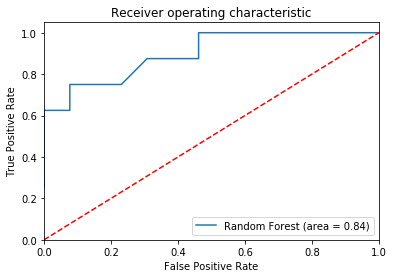

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[12  1]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.92      0.89        13
          1       0.86      0.75      0.80         8

avg / total       0.86      0.86      0.86        21

ROC CURVE


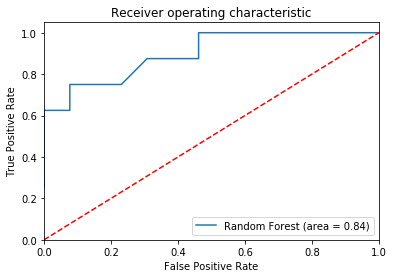

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
17.903755699605718


In [28]:
#Find optimal parameters
start_time = timeit.default_timer()
for i in Estimators:
    for j in maxFeatures:
        for k in maxDepth:
            hyperparameterTuneRandomForest(i,j,k,X_train_selected,y_train,X_validation_selected,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)            

### Random Forest

###### OPTIMAL PARAMETERS
###### Estimators = 100 ----   max features = None   ---------     Max depth = 10
###### Execution time (17.904 seconds)


# XGBoost with Cross Validation

In [29]:
#HYPER PARAMETER TUNE
depthMax = [1,2,3,4,5]
learningRate = [0.1,0.05,0.01] 
estimators = [50,100,150,200]

In [30]:
def hyperparameterTuneXGBoost(i,j,k,X_train,y_train,X_test,y_test):

    XGBModel = XGBClassifier(max_depth=i,learning_rate=j, n_estimators=k,random_state=123)
    XGBModel.fit(X_train, y_train)

    y_pred = XGBModel.predict(X_test)

    # evaluate predictions
    print("  Max Depth =" + str(i) + "          Learning Rate =" + str(j) + "         Estimators =" + str(k) )


    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, XGBModel.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, XGBModel.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

  Max Depth =1          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


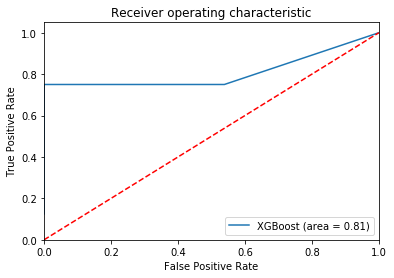

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


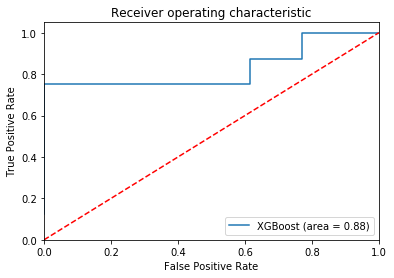

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


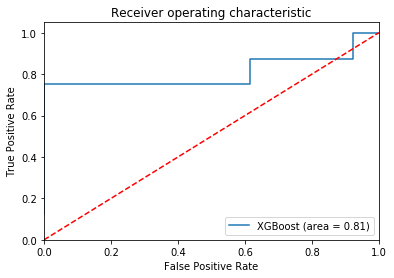

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


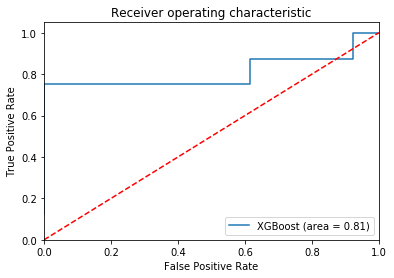

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


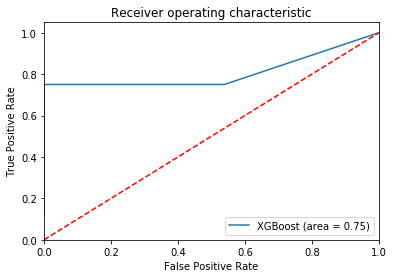

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


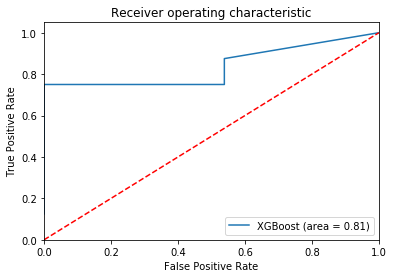

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


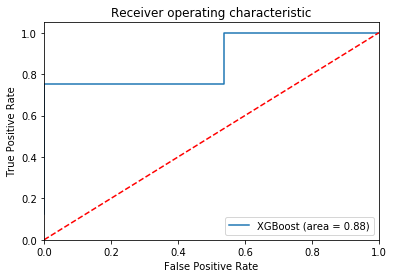

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


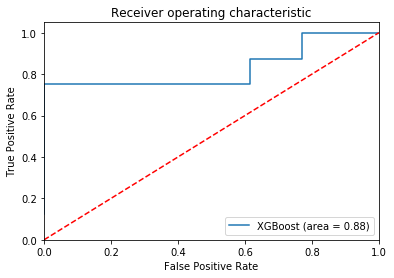

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


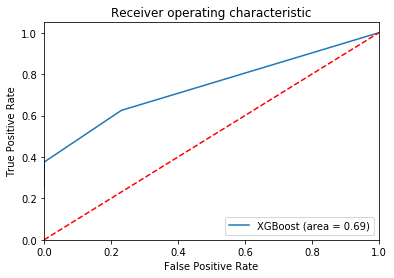

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


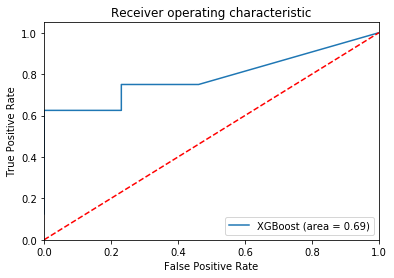

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


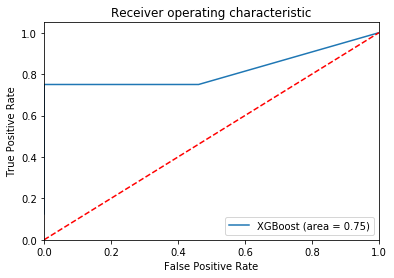

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


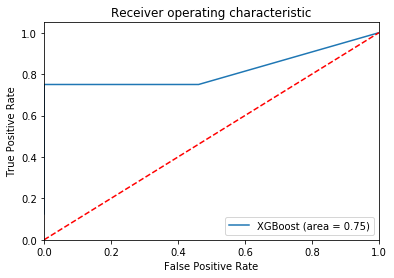

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


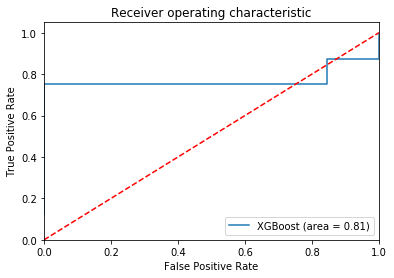

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


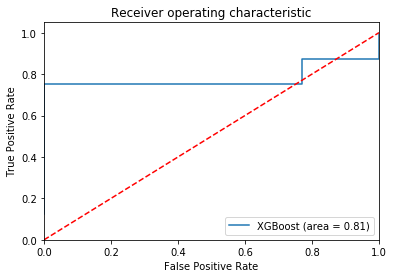

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


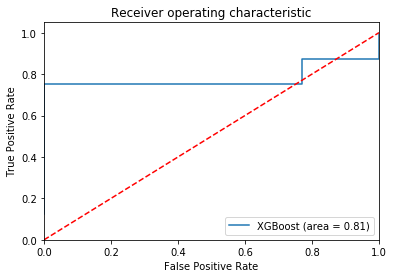

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


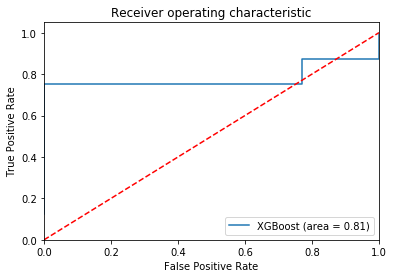

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


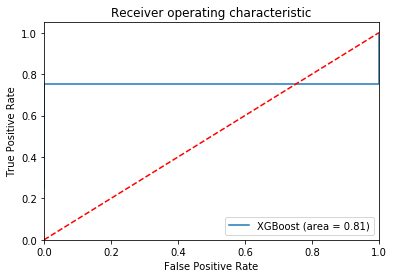

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


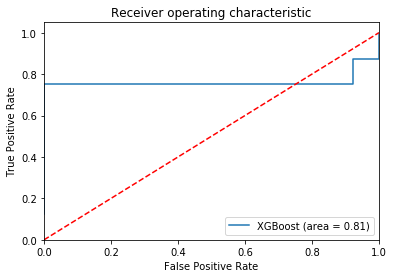

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


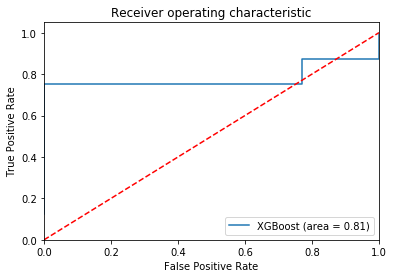

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


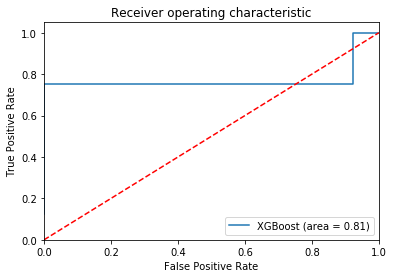

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


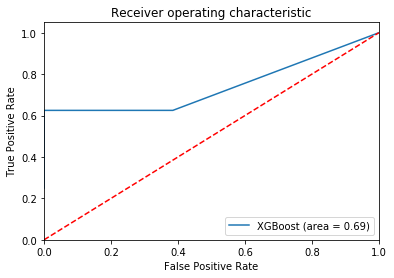

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


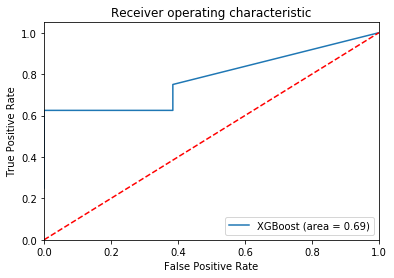

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


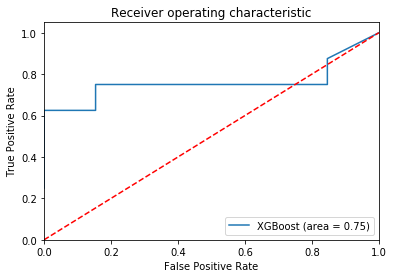

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


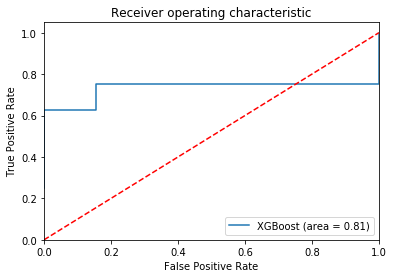

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


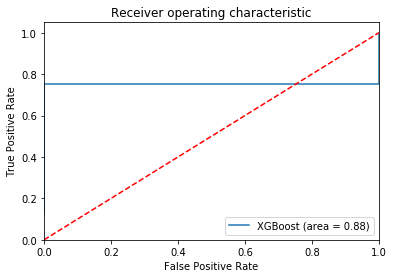

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


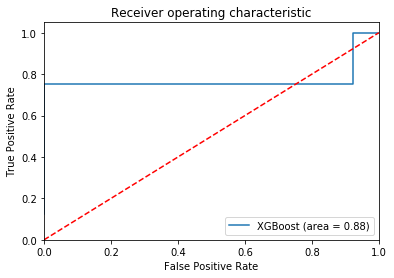

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


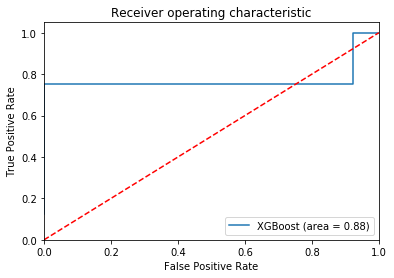

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


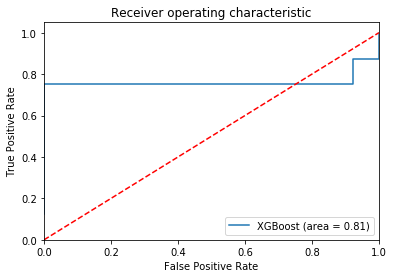

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


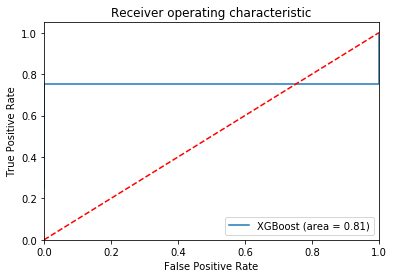

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


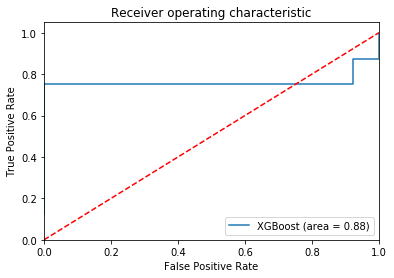

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


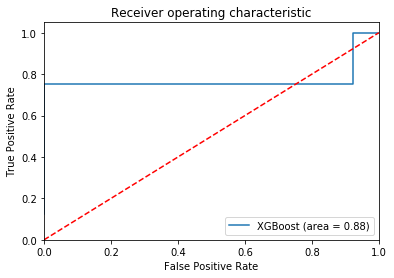

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


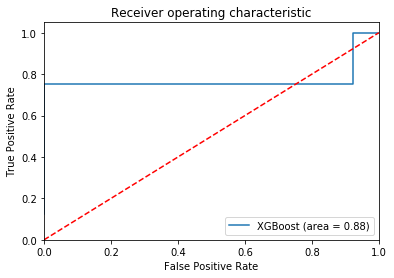

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


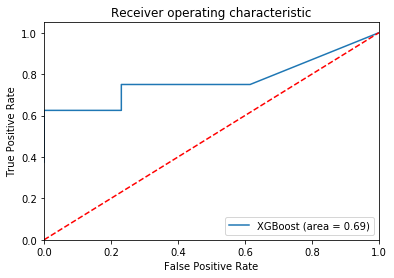

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


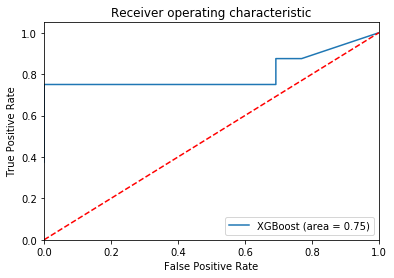

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


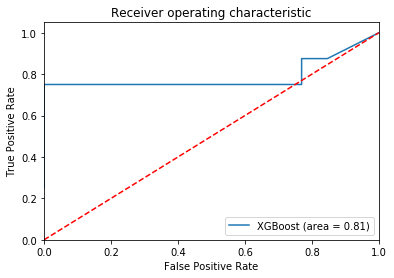

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


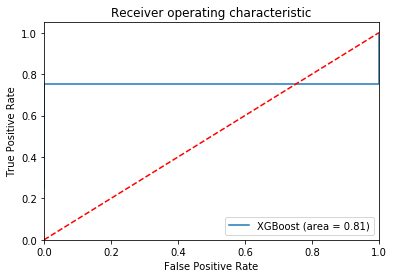

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


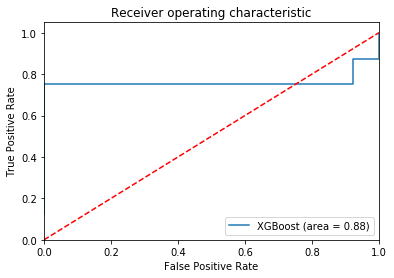

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


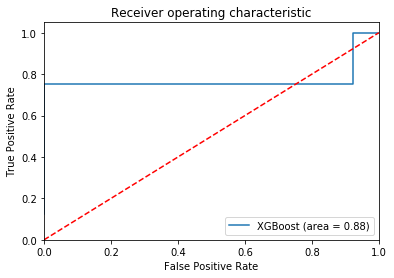

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


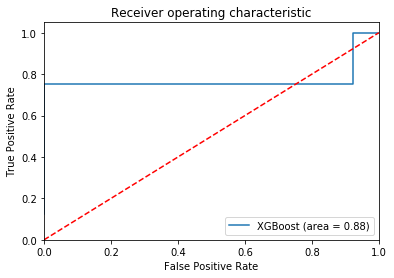

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


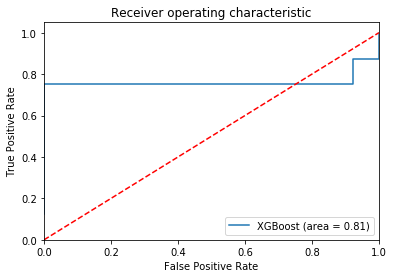

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


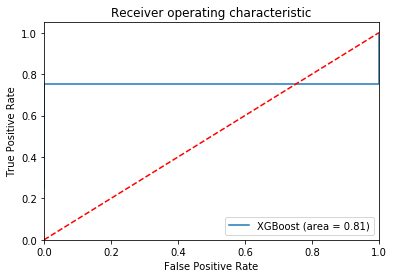

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


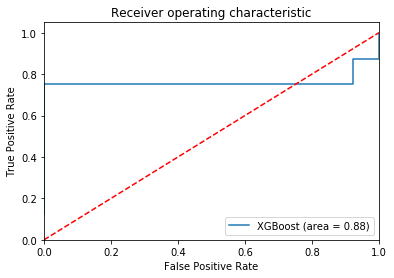

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


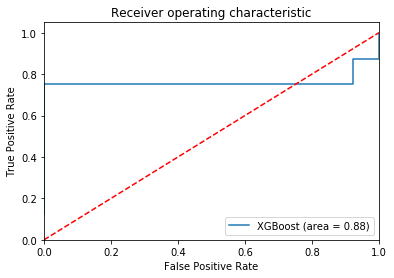

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


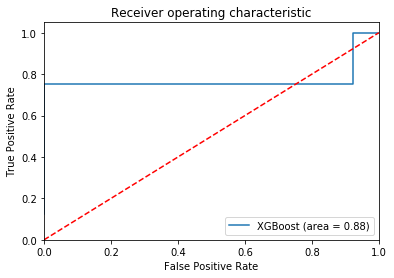

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


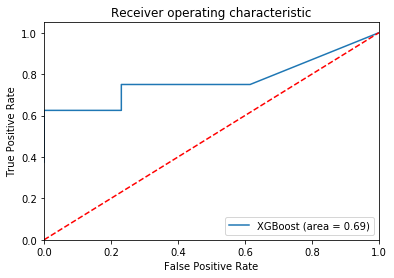

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


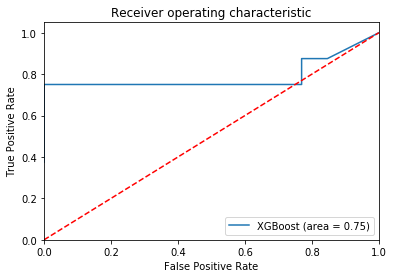

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


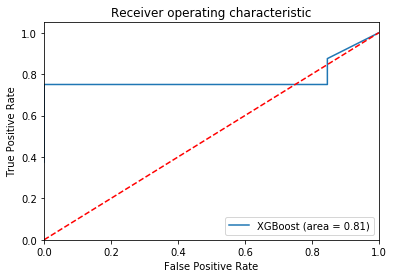

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


  Max Depth =4          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


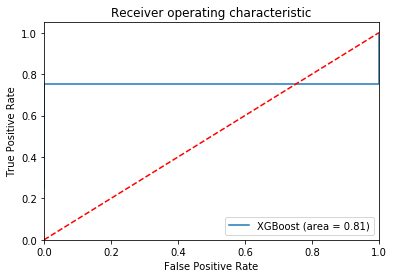

C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


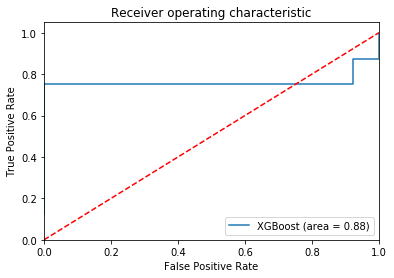

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


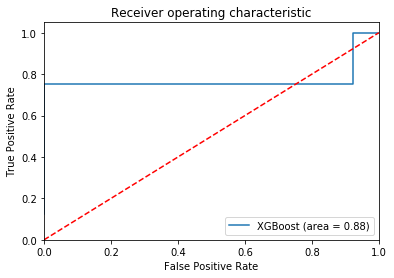

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


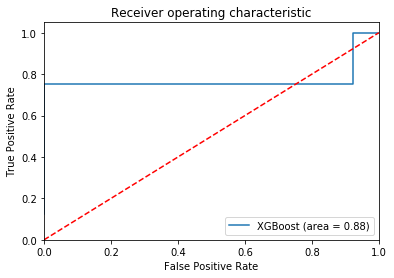

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


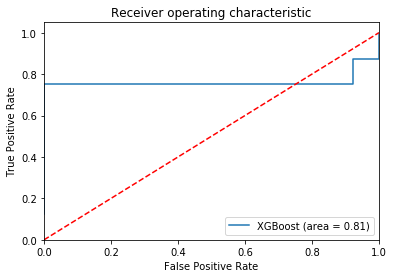

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


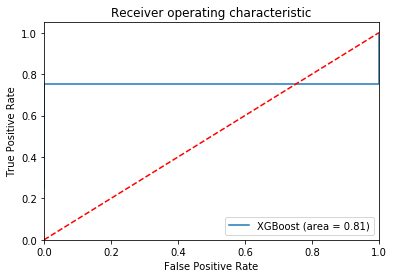

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


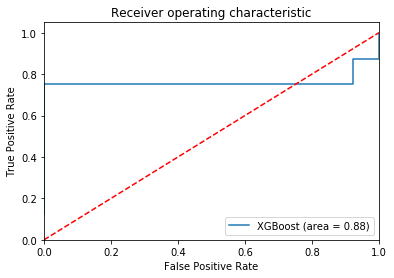

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


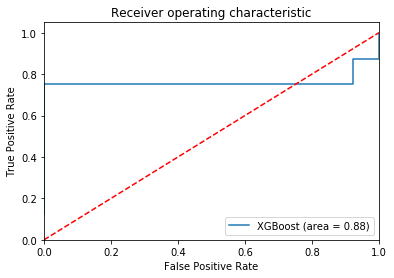

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 2  6]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        13
          1       1.00      0.75      0.86         8

avg / total       0.92      0.90      0.90        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


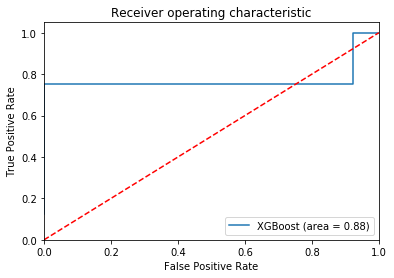

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[13  0]
 [ 5  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       1.00      0.38      0.55         8

avg / total       0.83      0.76      0.73        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


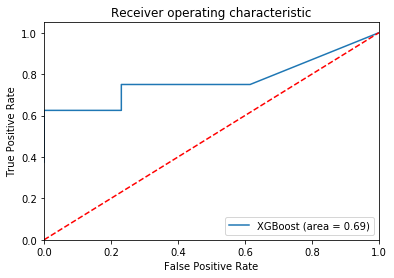

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[13  0]
 [ 4  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      1.00      0.87        13
          1       1.00      0.50      0.67         8

avg / total       0.85      0.81      0.79        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


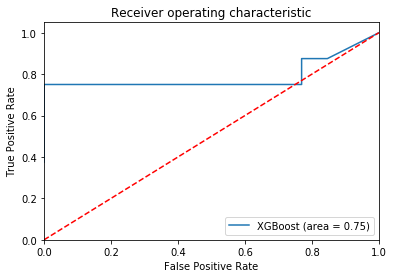

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


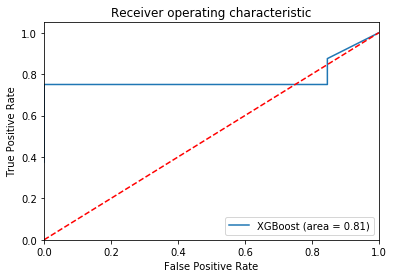

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


  Max Depth =5          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[13  0]
 [ 3  5]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.62      0.77         8

avg / total       0.88      0.86      0.85        21

ROC CURVE


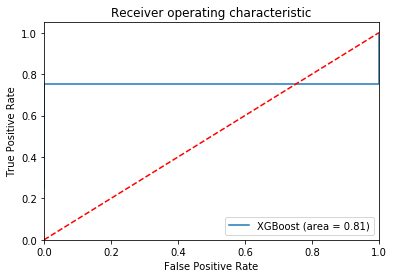

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
6.733476412499808


In [31]:
start_time = timeit.default_timer()
for i in depthMax:
    for j in learningRate:
        for k in estimators:
            hyperparameterTuneXGBoost(i,j,k,X_train_selected,y_train,X_validation_selected,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)  

### XGBOOST

###### OPTIMAL PARAMETERS
###### #Max Depth =5 --------     Learning Rate =0.05    ----------     Estimators =200
###### Execution time 6.733 seconds)


# Test on Unseen Data with optimal hyperparameters

## Logistic Regression

        C =0.5          Maximum Iterations =300
CONFUSION MATRIX:   
[[10  7]
 [ 0  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       1.00      0.59      0.74        17
          1       0.36      1.00      0.53         4

avg / total       0.88      0.67      0.70        21

ROC CURVE


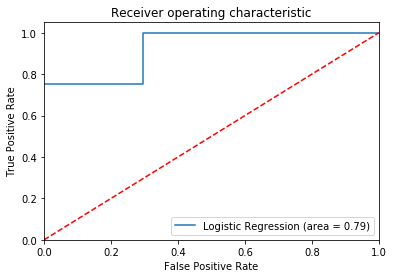

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [32]:
hyperparameterTuneLogistic(0.5,300,X_train_selected,y_train,X_test_selected,y_test)

## Random Forest

  Estimators =100          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[16  1]
 [ 0  4]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       1.00      0.94      0.97        17
          1       0.80      1.00      0.89         4

avg / total       0.96      0.95      0.95        21

ROC CURVE


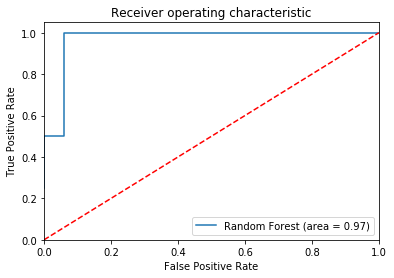

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [33]:
hyperparameterTuneRandomForest(100,None,10,X_train_selected,y_train,X_test_selected,y_test)

## XGBoost

  Max Depth =5          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[15  2]
 [ 1  3]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.88      0.91        17
          1       0.60      0.75      0.67         4

avg / total       0.87      0.86      0.86        21

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


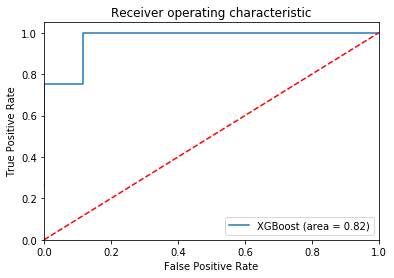

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [34]:
hyperparameterTuneXGBoost(5,0.05,200,X_train_selected,y_train,X_test_selected,y_test)